In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import os
import re

# from xgboost import XGBClassifier

files = os.listdir("./input")
print(files)

['df_test_cleaned.csv', 'df_test_dummy.csv', 'df_test_labelencoded.csv', 'df_test_onehot.csv', 'df_train_cleaned.csv', 'df_train_dummy.csv', 'df_train_labelencoded.csv', 'df_train_onehot.csv', 'raw']


In [2]:
df_train = pd.read_csv('./input/df_train_cleaned.csv')
df_test = pd.read_csv('./input/df_test_cleaned.csv')

df_train_oh = pd.read_csv('./input/df_train_onehot.csv')
df_test_oh = pd.read_csv('./input/df_test_onehot.csv')

df_train_label = pd.read_csv('./input/df_train_labelencoded.csv')
df_test_label = pd.read_csv('./input/df_test_labelencoded.csv')

In [3]:
print("df_train.shape", df_train.shape)
df_train.head()

df_train.shape (891, 9)


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_size,IsAlone
0,0,3,male,22.0,7.2500,S,Mr,2,0
1,1,1,female,38.0,71.2833,C,Mrs,2,0
2,1,3,female,26.0,7.9250,S,Miss,1,1
3,1,1,female,35.0,53.1000,S,Mrs,2,0
4,0,3,male,35.0,8.0500,S,Mr,1,1


In [4]:
print("df_test.shape", df_test.shape)
df_test.head()

df_test.shape (418, 8)


,Pclass,Sex,Age,Fare,Embarked,Title,Family_size,IsAlone
0,3,male,34.5,7.8292,Q,Mr,1,1
1,3,female,47.0,7.0000,S,Mrs,2,0
2,2,male,62.0,9.6875,Q,Mr,1,1
3,3,male,27.0,8.6625,S,Mr,1,1
4,3,female,22.0,12.2875,S,Mrs,3,0


In [5]:
print("df_train_oh.shape", df_train_oh.shape)
df_train_oh.head()

df_train_oh.shape (891, 17)


,Survived,Pclass,Age,Fare,Family_size,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0,0
1,1,1,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1,0
2,1,3,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0,0
3,1,1,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1,0
4,0,3,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0,0


In [6]:
print("df_test_oh.shape", df_test_oh.shape)
df_test_oh.head()

df_test_oh.shape (418, 16)


,Pclass,Age,Fare,Family_size,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,34.5,7.8292,1,1,0,1,0,1,0,0,0,0,1,0,0
1,3,47.0,7.0000,2,0,1,0,0,0,1,0,0,0,0,1,0
2,2,62.0,9.6875,1,1,0,1,0,1,0,0,0,0,1,0,0
3,3,27.0,8.6625,1,1,0,1,0,0,1,0,0,0,1,0,0
4,3,22.0,12.2875,3,0,1,0,0,0,1,0,0,0,0,1,0


In [7]:
print("df_train_label.shape", df_train_label.shape)
df_train_label.head()

df_train_label.shape (891, 9)


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_size,IsAlone
0,0,3,1,22.0,7.2500,2,3,2,0
1,1,1,0,38.0,71.2833,0,4,2,0
2,1,3,0,26.0,7.9250,2,2,1,1
3,1,1,0,35.0,53.1000,2,4,2,0
4,0,3,1,35.0,8.0500,2,3,1,1


In [8]:
print("df_test_label.shape", df_test_label.shape)
df_test_label.head()

df_test_label.shape (418, 8)


,Pclass,Sex,Age,Fare,Embarked,Title,Family_size,IsAlone
0,3,1,34.5,7.8292,1,2,1,1
1,3,0,47.0,7.0000,2,3,2,0
2,2,1,62.0,9.6875,1,2,1,1
3,3,1,27.0,8.6625,2,2,1,1
4,3,0,22.0,12.2875,2,3,3,0


## Use df_train_oh
### df_train_oh -> x_df_train, y_df_train

In [9]:
x_df_train = df_train_oh.drop('Survived', axis=1)

print("x_df_train.shape:", x_df_train.shape)
x_df_train.head()

x_df_train.shape: (891, 16)


,Pclass,Age,Fare,Family_size,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0,0
1,1,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1,0
2,3,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0,0
3,1,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1,0
4,3,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0,0


In [10]:
y_df_train = pd.DataFrame(df_train_oh['Survived'])

print("y_df_train.shape:", y_df_train.shape)
y_df_train.head()

y_df_train.shape: (891, 1)


,Survived
0,0
1,1
2,1
3,1
4,0


## Split df_train into x_train, x_dev, y_train, y_dev

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_dev, y_train, y_dev = train_test_split(x_df_train, y_df_train, random_state=0)

print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_dev.shape: ", x_dev.shape)
print("y_dev.shape: ", y_dev.shape)

x_train.shape:  (668, 16)
y_train.shape:  (668, 1)
x_dev.shape:  (223, 16)
y_dev.shape:  (223, 1)


## Normalization

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [14]:
x_train.head()

,Pclass,Age,Fare,Family_size,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
105,3,28.0,7.8958,1,1,0,1,0,0,1,0,0,0,1,0,0
68,3,17.0,7.9250,7,0,1,0,0,0,1,0,0,1,0,0,0
253,3,30.0,16.1000,2,0,0,1,0,0,1,0,0,0,1,0,0
320,3,22.0,7.2500,1,1,0,1,0,0,1,0,0,0,1,0,0
706,2,45.0,13.5000,1,1,1,0,0,0,1,0,0,0,0,1,0


In [15]:
scaler = MinMaxScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), index = x_train.index, columns = x_train.columns)
x_dev_scaled = pd.DataFrame(scaler.transform(x_dev), index = x_dev.index, columns = x_dev.columns)
x_train_scaled.head()

,Pclass,Age,Fare,Family_size,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
105,1.0,0.344510,0.015412,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
68,1.0,0.205849,0.015469,0.6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
253,1.0,0.369721,0.031425,0.1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
320,1.0,0.268877,0.014151,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
706,0.5,0.558805,0.026350,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), index = x_train.index, columns = x_train.columns)
x_dev_scaled = pd.DataFrame(scaler.transform(x_dev), index = x_dev.index, columns = x_dev.columns)
x_train_scaled.head()

,Pclass,Age,Fare,Family_size,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
105,0.830129,-0.117273,-0.483808,-0.550403,0.808372,-0.727052,0.727052,-0.458416,-0.31414,0.5981,-0.067166,-0.227966,-0.496255,0.833925,-0.402168,-0.140881
68,0.830129,-0.965004,-0.483231,3.013433,-1.237054,1.375418,-1.375418,-0.458416,-0.31414,0.5981,-0.067166,-0.227966,2.015095,-1.199148,-0.402168,-0.140881
253,0.830129,0.036860,-0.321651,0.043570,-1.237054,-0.727052,0.727052,-0.458416,-0.31414,0.5981,-0.067166,-0.227966,-0.496255,0.833925,-0.402168,-0.140881
320,0.830129,-0.579672,-0.496572,-0.550403,0.808372,-0.727052,0.727052,-0.458416,-0.31414,0.5981,-0.067166,-0.227966,-0.496255,0.833925,-0.402168,-0.140881
706,-0.364971,1.192858,-0.373040,-0.550403,0.808372,1.375418,-1.375418,-0.458416,-0.31414,0.5981,-0.067166,-0.227966,-0.496255,-1.199148,2.486523,-0.140881


## Modelling (Keras)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import regularizers
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


In [18]:
def Model (input_shape):
    
    model = Sequential()
    model.add(Dense(30, activation='relu', input_dim=input_shape, kernel_initializer='uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    return model

In [19]:
model = Model(x_train_scaled.shape[1])
model.summary()

W0822 13:46:37.331436  3300 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0822 13:46:37.352381  3300 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0822 13:46:37.355373  3300 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0822 13:46:37.374322  3300 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0822 13:46:37.384325  3300 de

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                510       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total para

In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

W0822 13:46:43.108136  3300 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0822 13:46:43.137058  3300 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0822 13:46:43.143042  3300 deprecation.py:323] From D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [21]:
history = model.fit(x = x_train_scaled, y = y_train, epochs = 100, batch_size = 30, verbose = 1)

Epoch 1/100
668/668 [==============================] - 0s 618us/step - loss: 0.6919 - acc: 0.6138
Epoch 2/100
668/668 [==============================] - 0s 49us/step - loss: 0.6889 - acc: 0.6138
Epoch 3/100
668/668 [==============================] - 0s 54us/step - loss: 0.6821 - acc: 0.6377
Epoch 4/100
668/668 [==============================] - 0s 54us/step - loss: 0.6540 - acc: 0.7380
Epoch 5/100
668/668 [==============================] - 0s 51us/step - loss: 0.5924 - acc: 0.7784
Epoch 6/100
668/668 [==============================] - 0s 73us/step - loss: 0.5491 - acc: 0.7874
Epoch 7/100
668/668 [==============================] - 0s 73us/step - loss: 0.5052 - acc: 0.8039
Epoch 8/100
668/668 [==============================] - 0s 62us/step - loss: 0.5092 - acc: 0.7934
Epoch 9/100
668/668 [==============================] - 0s 55us/step - loss: 0.5107 - acc: 0.8084
Epoch 10/100
668/668 [==============================] - 0s 57us/step - loss: 0.5017 - acc: 0.7994
Epoch 11/100
668/668 [======

In [22]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


## Model Evaluation (df_train)

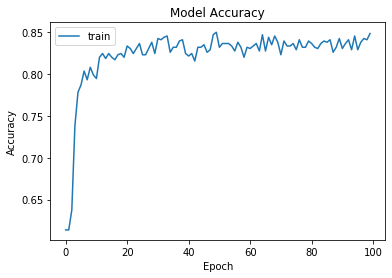

In [23]:
plt.plot(history.history['acc'])
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()

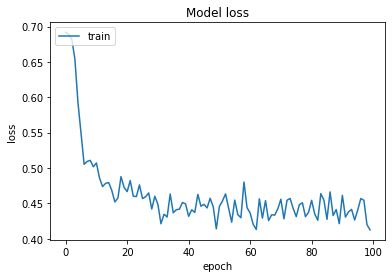

In [24]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [25]:
score = model.evaluate(x_dev_scaled, y_dev, batch_size=30)
print("loss:", score[0])
print("metric (accuracy): ", score[1])

223/223 [==============================] - 0s 295us/step
loss: 0.40204423371986425
metric (accuracy):  0.8251121020103249


## Prediction (df_test)

In [28]:
y_preds = model.predict(df_test_oh)

submission = pd.read_csv("./input/raw/gender_submission.csv", index_col='PassengerId')
submission['Survived'] = y_preds.astype(int)
submission.to_csv('./output/submission_titanic.csv')

## Plot Model png

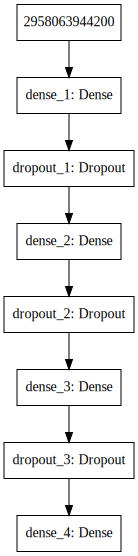

In [29]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

plot_model(model, to_file='./output/model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

**GRAFICOS**

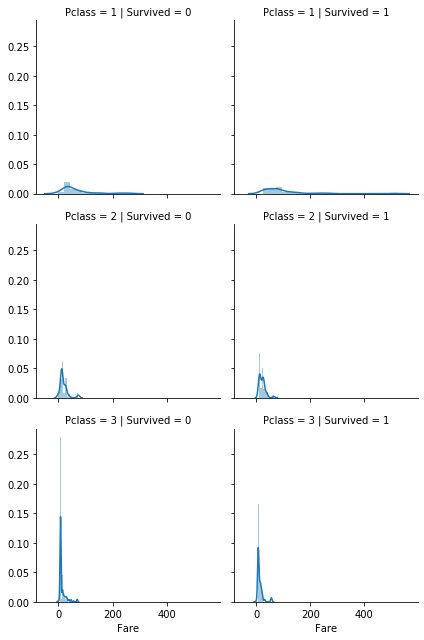

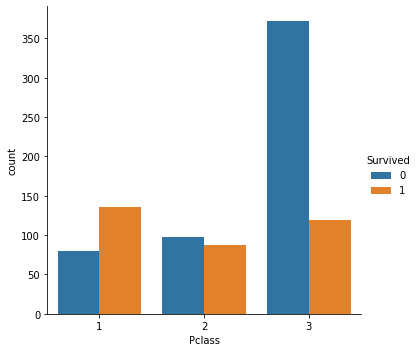

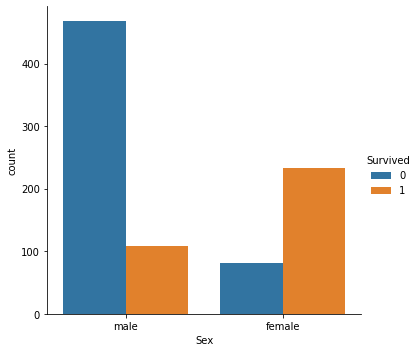

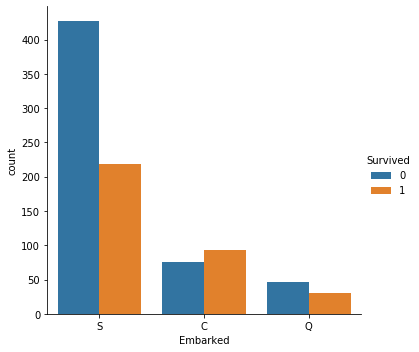

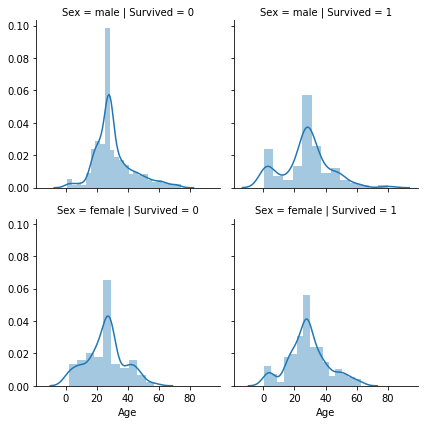

In [30]:
sns.FacetGrid(df_train, col='Survived',row='Pclass').map(sns.distplot,'Fare')
"""
sns.catplot("Family_Numerous", data=df_train, aspect=2.0, kind='count',
                       hue='Survived')
"""
sns.catplot("Pclass", data=df_train, aspect=1.0, kind='count',
                       hue='Survived')

sns.catplot("Sex", data=df_train, aspect=1.0, kind='count',
                       hue='Survived')

sns.catplot("Embarked", data=df_train, aspect=1.0, kind='count',
                       hue='Survived')

sns.FacetGrid(df_train, col='Survived',row='Sex').map(sns.distplot,'Age')

df_surv_male = []


**SAVING THE SUBMISSION TO CSV**